# Lecture des fichiers :

In [45]:
# Définir la fonction de remplacement
methodes = {
          "WordSwapNeighboringCharacterSwap":"NeighbCharSwap",
          "WordSwapQWERTY":"QWERTYCharSub",
          "WordSwapRandomCharacterSubstitution":"RandomCharSub",
          "naturality_by_removing_stop_words":"RemoveStopWords",
          'summarization_with_t5-base_from_description_to_title':'T5DescToTitle',
          'WordInnerSwapRandom':"RandomOrderSwap",
          'back_translation_pivot_language_de':"BackTranslation",
          'ramsrigouthamg/t5_paraphraser':"T5QQP",
          'WordSwapWordNet':"WordNetSynSwap",
          'WordSwapEmbedding':"WordEmbedSynSwap"}
def remplacer_mot(methodes,phrase):
  if phrase == "BM25":
    return "original_query"
  for mot_a_remplacer in methodes:
    if mot_a_remplacer in phrase:
        return  methodes[mot_a_remplacer]
  return phrase

In [11]:
remplacer_mot(methodes,"BM25+WordSwapQWERTY")


'BM25+QWERTYCharSub'

## TREC :

In [46]:
import pandas as pd
def lecture (fichier):
  # Lire le fichier CSV
  df = pd.read_csv(fichier)

  df['name'] = df['name'].apply(lambda x: remplacer_mot(methodes, x))
  df = df[["name","ndcg_cut_10"]]
  return df

lecture ('BM_25.csv')

,name,ndcg_cut_10
0,original_query,0.479540
1,NeighbCharSwap,0.274701
2,QWERTYCharSub,0.243548
3,RandomCharSub,0.231450
4,RemoveStopWords,0.477754
5,T5DescToTitle,0.421481
6,RandomOrderSwap,0.479540
7,BackTranslation,0.396437
8,T5QQP,0.472212
9,WordNetSynSwap,0.348766


In [47]:
trec = ["BM_25.csv","BM_25_RM3.csv","BM25_KNRM.csv","BM25_CKNRM.csv","BM25_EPIC.csv","BM25_BERT.csv","BM25_T5.csv"]
colonnes = ["BM25", "RM3", "KNRM", "CKNRM" ,"EPIC" ,"BERT", "T5"]

trec_scores = pd.DataFrame()

for idx, fichier in enumerate(trec):
    df = lecture (fichier)

    trec_scores[colonnes[idx]] = df['ndcg_cut_10']

trec_scores['name'] = lecture (trec[0])['name']

trec_scores = trec_scores[['name'] + colonnes]

trec_scores

,name,BM25,RM3,KNRM,CKNRM,EPIC,BERT,T5
0,original_query,0.479540,0.515595,0.496959,0.493117,0.624047,0.628664,0.699780
1,NeighbCharSwap,0.274701,0.274816,0.317241,0.307987,0.389341,0.422847,0.494417
2,QWERTYCharSub,0.243548,0.250378,0.275153,0.296539,0.349635,0.388942,0.446060
3,RandomCharSub,0.231450,0.234741,0.222502,0.226251,0.294983,0.316191,0.396311
4,RemoveStopWords,0.477754,0.511339,0.489481,0.475599,0.621385,0.625341,0.686159
5,T5DescToTitle,0.421481,0.434432,0.394968,0.392752,0.506071,0.537398,0.571683
6,RandomOrderSwap,0.479540,0.515595,0.496959,0.470756,0.622721,0.612984,0.697020
7,BackTranslation,0.396437,0.419520,0.376331,0.360486,0.530082,0.559598,0.605816
8,T5QQP,0.472212,0.504274,0.437429,0.460877,0.604045,0.629245,0.704520
9,WordNetSynSwap,0.348766,0.365042,0.359142,0.360497,0.449044,0.497299,0.545733


## ANTIQUE:

In [52]:
antique = ["antique_BM_25.csv","antique_BM_25_RM3.csv","antique_BM25_KNRM.csv","antique_BM25_CKNRM.csv","antique_BM25_EPIC.csv","antique_BM25_BERT.csv","antique_BM25_T5.csv"]
colonnes = ["BM25", "RM3", "KNRM", "CKNRM" ,"EPIC" ,"BERT", "T5"]

antique_scores = pd.DataFrame()

for idx, fichier in enumerate(antique):
    df = lecture (fichier)

    antique_scores[colonnes[idx]] = df['ndcg_cut_10']

antique_scores['name'] = lecture (antique[0])['name']

antique_scores = antique_scores[['name'] + colonnes]

antique_scores

,name,BM25,RM3,KNRM,CKNRM,EPIC,BERT,T5
0,original_query,0.228598,0.217015,0.195348,0.206472,0.265964,0.298741,0.333343
1,NeighbCharSwap,0.155925,0.146874,0.149475,0.144357,0.184004,0.219756,0.250900
2,QWERTYCharSub,0.161297,0.152542,0.153281,0.155270,0.192009,0.228915,0.265228
3,RandomCharSub,0.162307,0.159323,0.150131,0.147622,0.187947,0.218040,0.245766
4,RemoveStopWords,0.226959,0.216080,0.225525,0.215285,0.269284,0.278089,0.319982
5,T5DescToTitle,0.167330,0.164611,0.172450,0.167238,0.200639,0.213728,0.239296
6,RandomOrderSwap,0.228587,0.216919,0.195337,0.197762,0.266102,0.296807,0.325507
7,BackTranslation,0.161758,0.154594,0.135938,0.143829,0.203180,0.232330,0.258100
8,T5QQP,0.220146,0.206255,0.188036,0.195704,0.261390,0.287625,0.321404
9,WordEmbedSynSwap,0.175915,0.171544,0.172996,0.168927,0.213856,0.246034,0.281352


In [107]:
categorie = {"original_query": "original_query",
    "NeighbCharSwap": "misspelling",
    "RandomCharSub": "misspelling",
    "QWERTYCharSub": "misspelling",
    "RemoveStopWords": "naturality",
    "T5DescToTitle": "naturality",
    "RandomOrderSwap": "ordering",
    "BackTranslation": "Paraphrasing",
    "T5QQP": "Paraphrasing",
    "WordEmbedSynSwap": "Paraphrasing",
    "WordNetSynSwap": "Paraphrasing",
    }

df['name'] = antique_scores['name'].apply(lambda x: remplacer_mot(categorie, x))
df



def lecture_per_q (fichier):
  # Lire le fichier CSV
  df = pd.read_csv(fichier)

  df['name'] = df['name'].apply(lambda x: remplacer_mot(methodes, x))
  df['name'] = df['name'].apply(lambda x: remplacer_mot(categorie, x))

  return df

df = lecture_per_q ('antique_BM_25_q.csv')

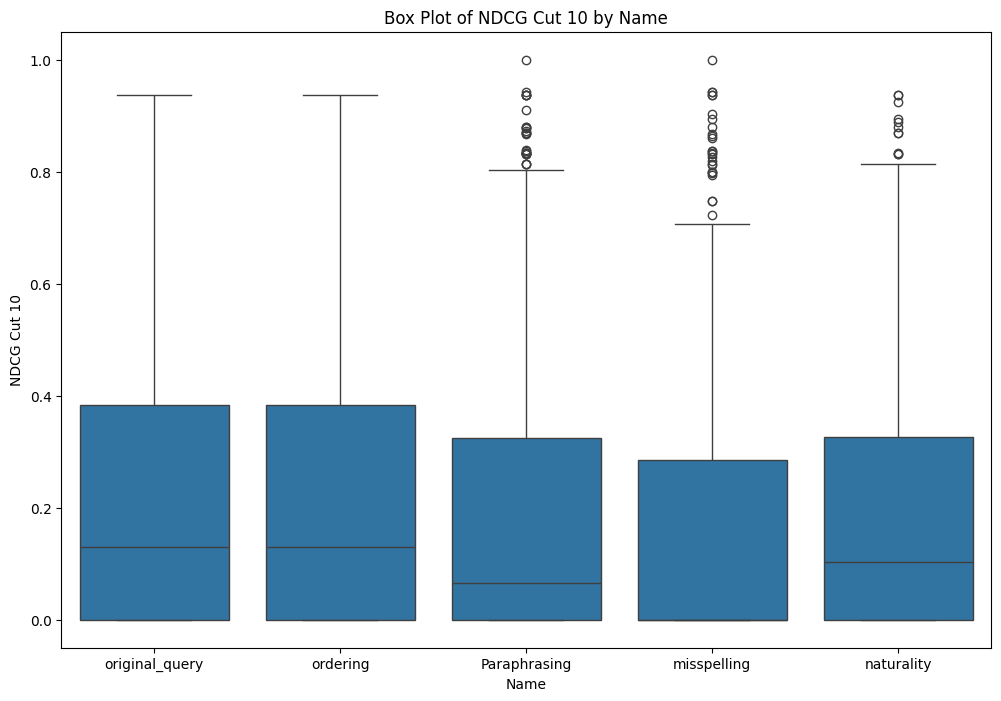

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='name', y='value', data=df)

plt.xlabel('Name')
plt.ylabel('NDCG Cut 10')
plt.title('Box Plot of NDCG Cut 10 by Name')

plt.show()


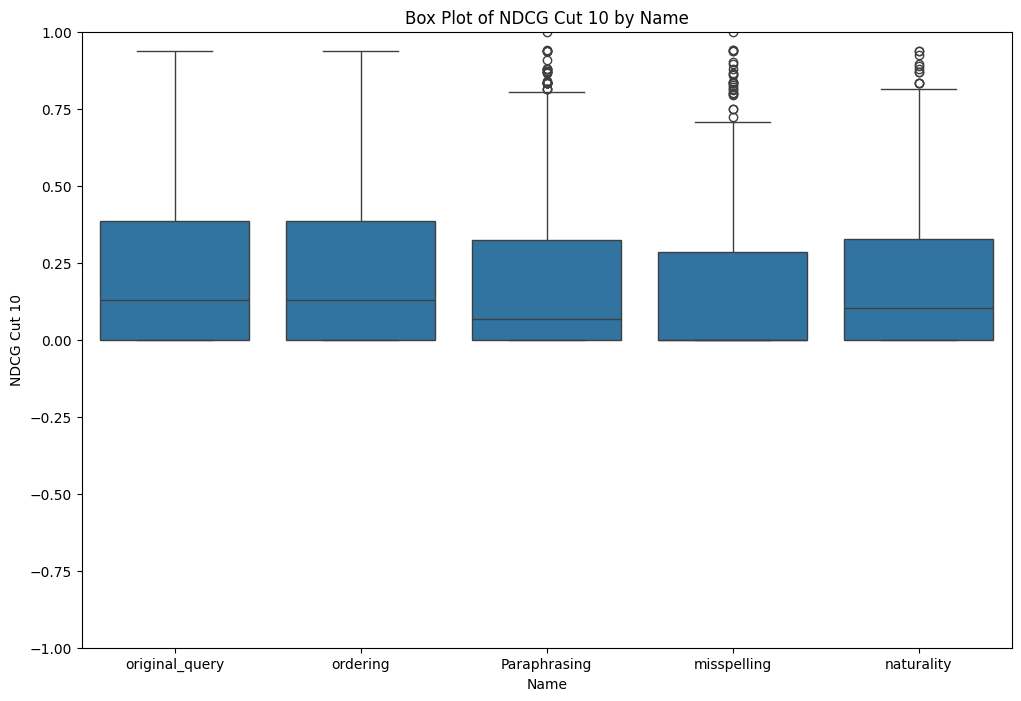

In [109]:
df2 = lecture_per_q ('antique_BM_25_q.csv')

plt.figure(figsize=(12, 8))
sns.boxplot(x='name', y='value', data=df2)
plt.ylim(-1, 1)

plt.xlabel('Name')
plt.ylabel('NDCG Cut 10')
plt.title('Box Plot of NDCG Cut 10 by Name')

plt.show()

In [110]:
df2

,name,qid,measure,value
0,original_query,1016750,ndcg_cut_10,0.000000
1,original_query,103298,ndcg_cut_10,0.813054
2,original_query,1034050,ndcg_cut_10,0.000000
3,original_query,1037897,ndcg_cut_10,0.000000
4,original_query,1051346,ndcg_cut_10,0.119019
...,...,...,...,...
2195,naturality,961127,ndcg_cut_10,0.121769
2196,naturality,963523,ndcg_cut_10,0.000000
2197,naturality,98438,ndcg_cut_10,0.247396
2198,naturality,986260,ndcg_cut_10,0.000000


## Calcul de la différence de score :

In [111]:
query_variations = pd.read_csv("variations_antique_labeled.csv")
df2 = pd.read_csv('antique_BM_25_q.csv')
df2['qid'] = df2['qid'].astype(str)
df2

,name,qid,measure,value
0,BM25,1016750,ndcg_cut_10,0.000000
1,BM25,103298,ndcg_cut_10,0.813054
2,BM25,1034050,ndcg_cut_10,0.000000
3,BM25,1037897,ndcg_cut_10,0.000000
4,BM25,1051346,ndcg_cut_10,0.119019
...,...,...,...,...
2195,BM25+summarization_with_t5-base_from_descripti...,961127,ndcg_cut_10,0.121769
2196,BM25+summarization_with_t5-base_from_descripti...,963523,ndcg_cut_10,0.000000
2197,BM25+summarization_with_t5-base_from_descripti...,98438,ndcg_cut_10,0.247396
2198,BM25+summarization_with_t5-base_from_descripti...,986260,ndcg_cut_10,0.000000


In [112]:
query_variations['name'] = query_variations.apply(lambda r, n="BM25": n+"+"+r['method'], axis=1)
query_variations['qid'] = query_variations['q_id'].astype(str)
only_valid = df2.merge(query_variations[query_variations['valid']][['qid', 'name', 'valid']], on=['qid', 'name'])
only_valid_with_baseline = only_valid.merge(df2[df2['name']=="BM25"], on=['qid', 'measure'])
only_valid_with_baseline["decrease"] = only_valid_with_baseline['value_x'] - only_valid_with_baseline['value_y']
only_valid_with_baseline["decrease_percentage"] = only_valid_with_baseline['decrease']/only_valid_with_baseline['value_y']
only_valid_with_baseline

,name_x,qid,measure,value_x,valid,name_y,value_y,decrease,decrease_percentage
0,BM25+WordInnerSwapRandom,1016750,ndcg_cut_10,0.000000,True,BM25,0.000000,0.000000,NaN
1,BM25+WordSwapEmbedding,1016750,ndcg_cut_10,0.201515,True,BM25,0.000000,0.201515,inf
2,BM25+WordSwapNeighboringCharacterSwap,1016750,ndcg_cut_10,0.000000,True,BM25,0.000000,0.000000,NaN
3,BM25+WordSwapRandomCharacterSubstitution,1016750,ndcg_cut_10,0.000000,True,BM25,0.000000,0.000000,NaN
4,BM25+back_translation_pivot_language_de,1016750,ndcg_cut_10,0.000000,True,BM25,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
1501,BM25+WordSwapNeighboringCharacterSwap,993601,ndcg_cut_10,0.199216,True,BM25,0.419628,-0.220412,-0.525256
1502,BM25+WordSwapRandomCharacterSubstitution,993601,ndcg_cut_10,0.199216,True,BM25,0.419628,-0.220412,-0.525256
1503,BM25+back_translation_pivot_language_de,993601,ndcg_cut_10,0.333061,True,BM25,0.419628,-0.086567,-0.206294
1504,BM25+naturality_by_removing_stop_words,993601,ndcg_cut_10,0.419628,True,BM25,0.419628,0.000000,0.000000


In [113]:
only_valid_with_baseline["name_y"].unique()

array(['BM25'], dtype=object)

In [114]:

only_valid_with_baseline['name_x'] = only_valid_with_baseline['name_x'].apply(lambda x: remplacer_mot(methodes, x))
only_valid_with_baseline['name_x'] = only_valid_with_baseline['name_x'].apply(lambda x: remplacer_mot(categorie, x))
only_valid_with_baseline

,name_x,qid,measure,value_x,valid,name_y,value_y,decrease,decrease_percentage
0,ordering,1016750,ndcg_cut_10,0.000000,True,BM25,0.000000,0.000000,NaN
1,Paraphrasing,1016750,ndcg_cut_10,0.201515,True,BM25,0.000000,0.201515,inf
2,misspelling,1016750,ndcg_cut_10,0.000000,True,BM25,0.000000,0.000000,NaN
3,misspelling,1016750,ndcg_cut_10,0.000000,True,BM25,0.000000,0.000000,NaN
4,Paraphrasing,1016750,ndcg_cut_10,0.000000,True,BM25,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
1501,misspelling,993601,ndcg_cut_10,0.199216,True,BM25,0.419628,-0.220412,-0.525256
1502,misspelling,993601,ndcg_cut_10,0.199216,True,BM25,0.419628,-0.220412,-0.525256
1503,Paraphrasing,993601,ndcg_cut_10,0.333061,True,BM25,0.419628,-0.086567,-0.206294
1504,naturality,993601,ndcg_cut_10,0.419628,True,BM25,0.419628,0.000000,0.000000


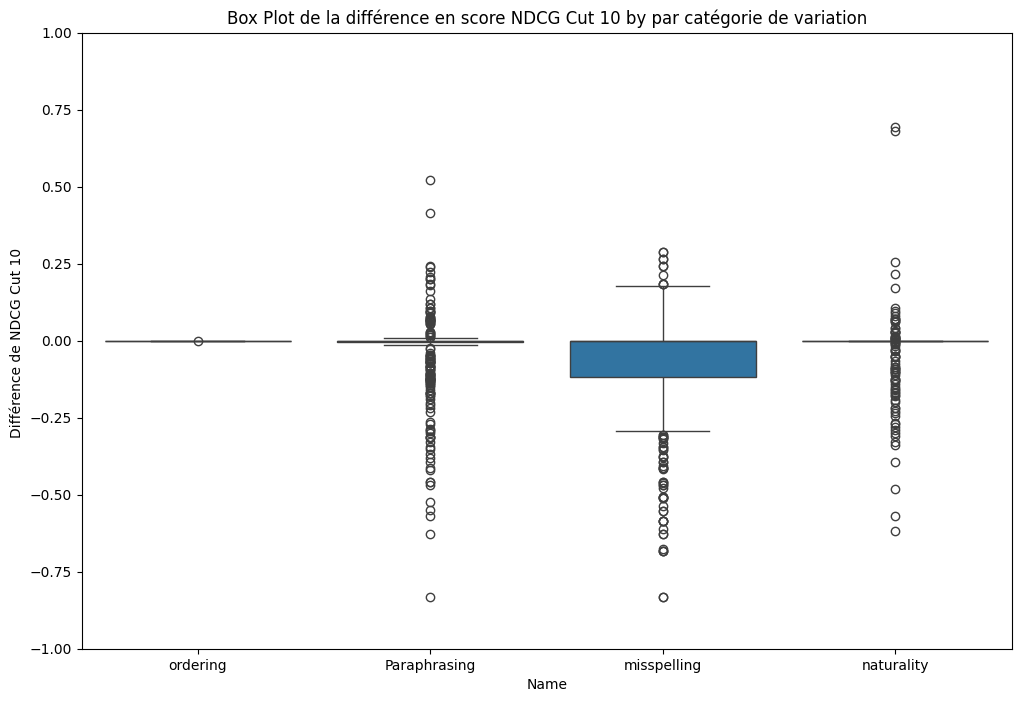

In [115]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='name_x', y='decrease', data=only_valid_with_baseline)
plt.ylim(-1, 1)

plt.xlabel('Name')
plt.ylabel('Différence de NDCG Cut 10 ')
plt.title('Box Plot de la différence en score NDCG Cut 10 by par catégorie de variation')

plt.show()

<ipython-input-141-513bc12c57d5>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='name_x', y='decrease', data=data_modele, ax=axes[i],palette=couleurs_pastel)
<ipython-input-141-513bc12c57d5>:32: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(x='name_x', y='decrease', data=data_modele, ax=axes[i],palette=couleurs_pastel)
<ipython-input-141-513bc12c57d5>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(data_modele['name_x'].unique(), rotation=90, ha='center')
<ipython-input-141-513bc12c57d5>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='name_x', y='decrease', data

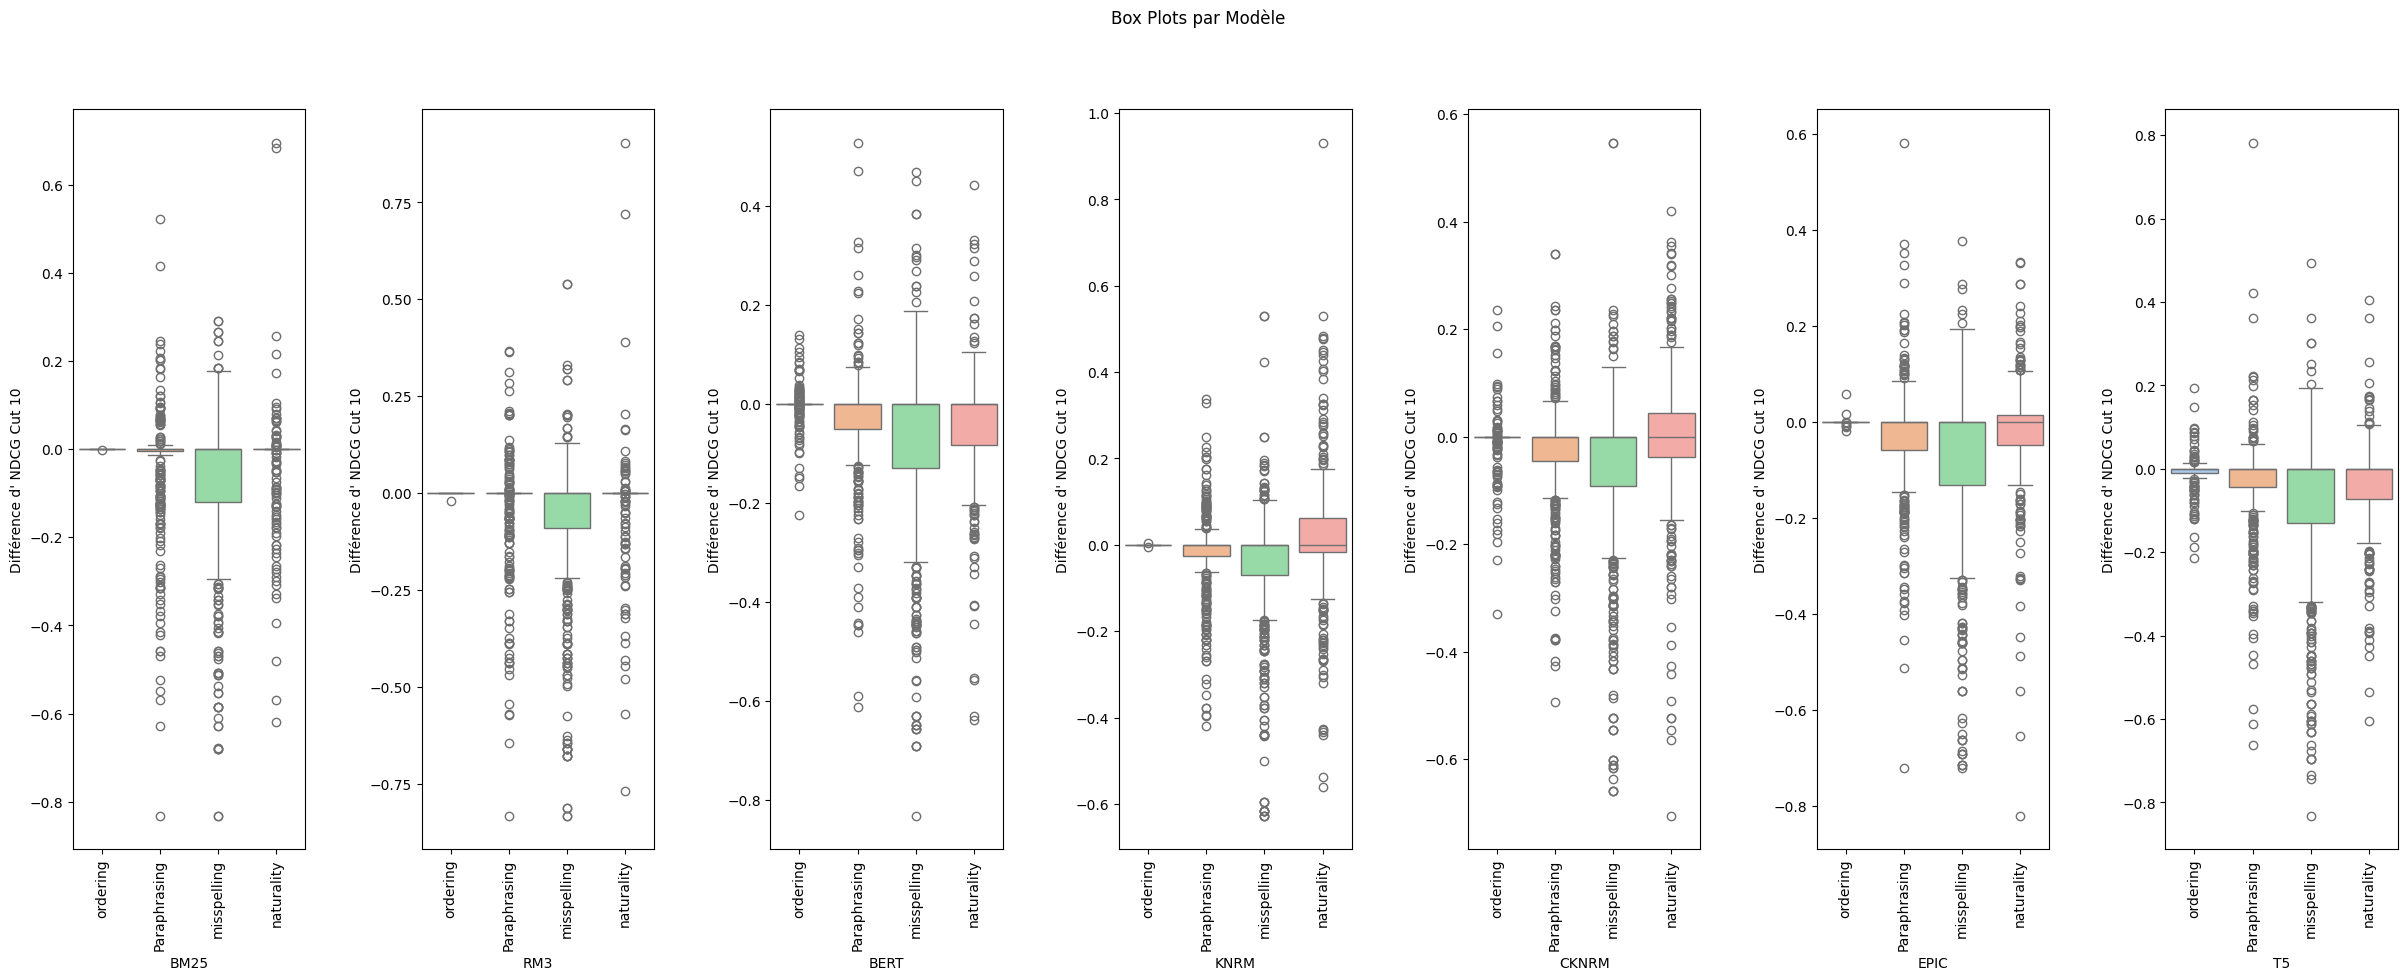

In [141]:

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(30, 10))

modeles = ['antique_BM_25_q.csv','antique_BM_25_RM3_q.csv', 'antique_BM25_BERT_q.csv', 'antique_BM25_KNRM_q.csv','antique_BM25_CKNRM_q.csv','antique_BM25_EPIC_q.csv', 'antique_BM25_T5_q.csv']
nom_modeles = ['BM25', 'BM25','BM25+BERT', 'BM25+KNRM','BM25+CKNRM', 'BM25+EPIC','BM25+T5']
nom_affichage = ['BM25', 'RM3','BERT', 'KNRM','CKNRM', 'EPIC','T5']


# Définir les couleurs pastel pour chaque modèle
couleurs_pastel = sns.color_palette("pastel")


for i, modele in enumerate(modeles):

    df3 = pd.read_csv(modele)
    df3['qid'] = df3['qid'].astype(str)

    variations = pd.read_csv("variations_antique_labeled.csv")
    variations['name'] = variations.apply(lambda r, n=nom_modeles[i]: n+"+"+r['method'], axis=1)
    variations['qid'] = variations['q_id'].astype(str)

    filtred = df3.merge(variations[variations['valid']][['qid', 'name', 'valid']], on=['qid', 'name'])
    comparaison_original_var = filtred.merge(df3[df3['name']==nom_modeles[i]], on=['qid', 'measure'])
    comparaison_original_var["decrease"] = comparaison_original_var['value_x'] - comparaison_original_var['value_y']
    comparaison_original_var["decrease_percentage"] = comparaison_original_var['decrease']/comparaison_original_var['value_y']

    comparaison_original_var['name_x'] = comparaison_original_var['name_x'].apply(lambda x: remplacer_mot(methodes, x))
    comparaison_original_var['name_x'] = comparaison_original_var['name_x'].apply(lambda x: remplacer_mot(categorie, x))


    data_modele = comparaison_original_var

    sns.boxplot(x='name_x', y='decrease', data=data_modele, ax=axes[i],palette=couleurs_pastel)

    axes[i].set_xticklabels(data_modele['name_x'].unique(), rotation=90, ha='center')

    axes[i].set_xlabel(nom_affichage[i])
    axes[i].set_ylabel('Différence d\' NDCG Cut 10')

    axes[i].title.set(y=1.05)

plt.subplots_adjust(wspace=0.5)

plt.subplots_adjust(top=0.85)

plt.suptitle('Box Plots par Modèle', y=0.95)

# Afficher le plot
plt.show()

<ipython-input-138-510ea3290750>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='name_x', y='decrease', data=data_modele, ax=axes[i], palette=couleurs_pastel,legend = False)
<ipython-input-138-510ea3290750>:38: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(x='name_x', y='decrease', data=data_modele, ax=axes[i], palette=couleurs_pastel,legend = False)
<ipython-input-138-510ea3290750>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(data_modele['name_x'].unique(), rotation=90, ha='center', fontsize=10)  # Augmenter la taille de la police des étiquettes x
<ipython-input-138-510ea3290750>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable 

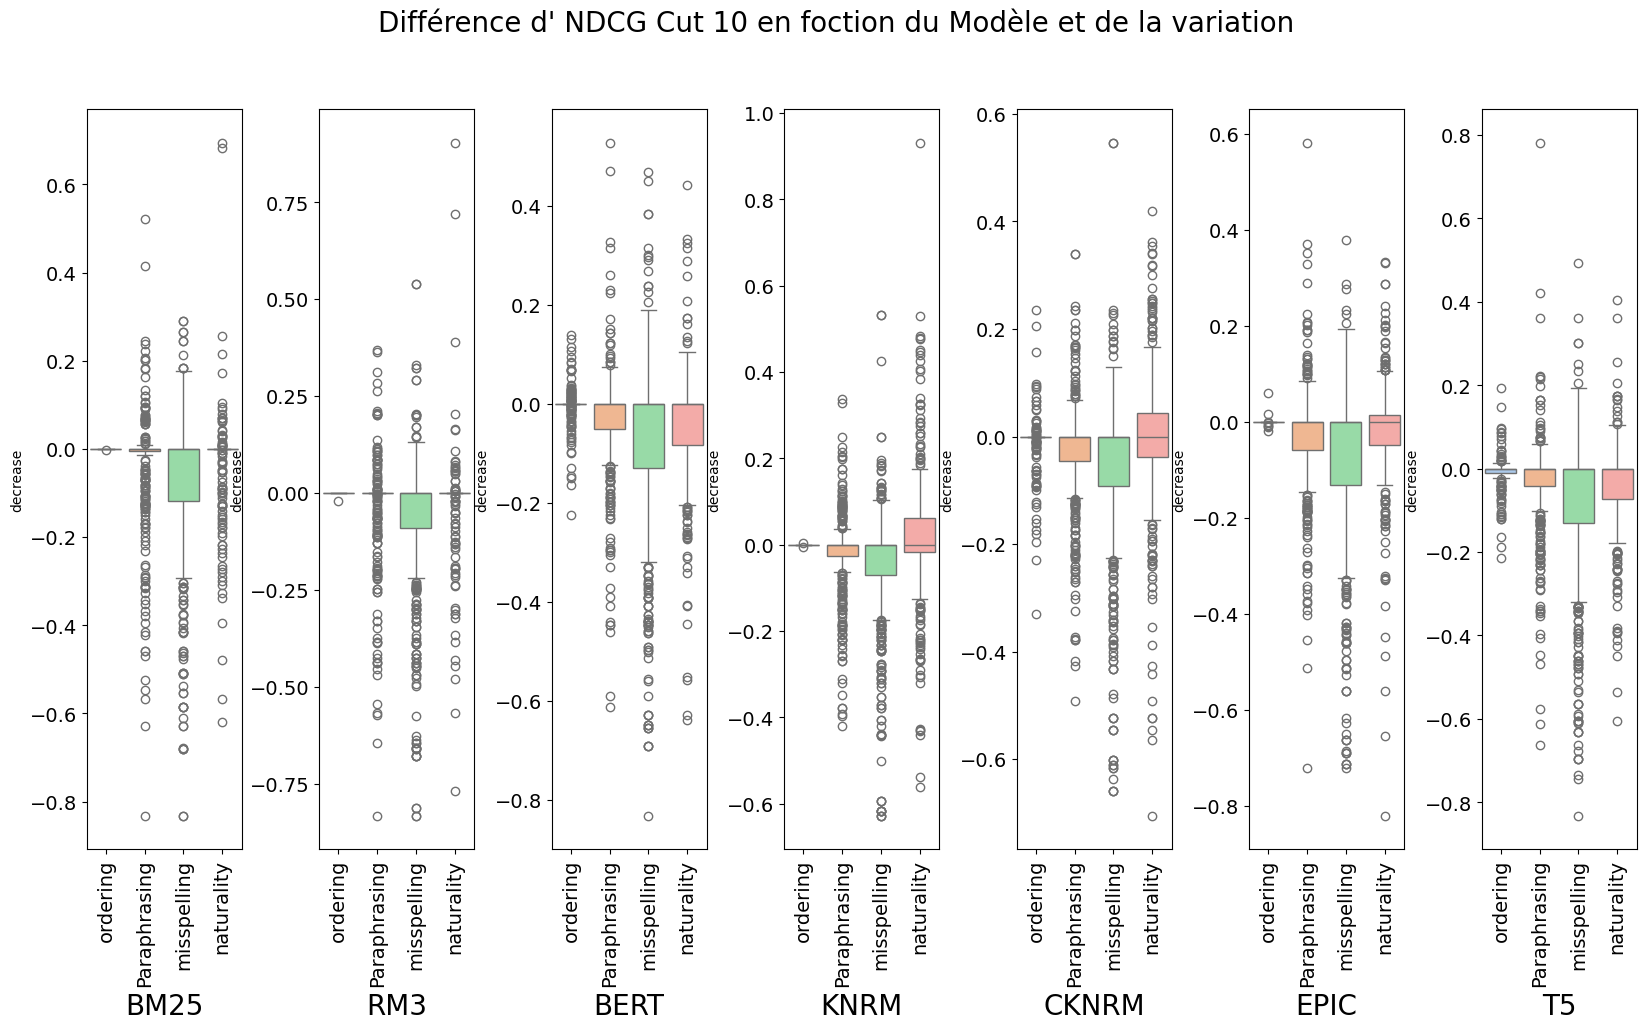

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fonction pour lire le fichier CSV
def lecture_per_q(file_path):
    return pd.read_csv(file_path)

# Définir les modèles et leurs noms
modeles = ['antique_BM_25_q.csv','antique_BM_25_RM3_q.csv', 'antique_BM25_BERT_q.csv', 'antique_BM25_KNRM_q.csv','antique_BM25_CKNRM_q.csv','antique_BM25_EPIC_q.csv', 'antique_BM25_T5_q.csv']
nom_modeles = ['BM25', 'BM25','BM25+BERT', 'BM25+KNRM','BM25+CKNRM', 'BM25+EPIC','BM25+T5']
nom_affichage = ['BM25', 'RM3','BERT', 'KNRM','CKNRM', 'EPIC','T5']

# Créer une grille de sous-graphiques avec une taille plus grande et carrée
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 10))

# Définir les couleurs pastel pour chaque modèle
couleurs_pastel = sns.color_palette("pastel")

for i, modele in enumerate(modeles):

    df3 = pd.read_csv(modele)
    df3['qid'] = df3['qid'].astype(str)

    query_variations = pd.read_csv("variations_antique_labeled.csv")
    query_variations['name'] = query_variations.apply(lambda r, n=nom_modeles[i]: n+"+"+r['method'], axis=1)
    query_variations['qid'] = query_variations['q_id'].astype(str)
    only_valid = df3.merge(query_variations[query_variations['valid']][['qid', 'name', 'valid']], on=['qid', 'name'])
    only_valid_with_baseline = only_valid.merge(df3[df3['name']==nom_modeles[i]], on=['qid', 'measure'])
    only_valid_with_baseline["decrease"] = only_valid_with_baseline['value_x'] - only_valid_with_baseline['value_y']
    only_valid_with_baseline["decrease_percentage"] = only_valid_with_baseline['decrease']/only_valid_with_baseline['value_y']

    only_valid_with_baseline['name_x'] = only_valid_with_baseline['name_x'].apply(lambda x: remplacer_mot(methodes, x))
    only_valid_with_baseline['name_x'] = only_valid_with_baseline['name_x'].apply(lambda x: remplacer_mot(categorie, x))

    data_modele = only_valid_with_baseline

    sns.boxplot(x='name_x', y='decrease', data=data_modele, ax=axes[i], palette=couleurs_pastel,legend = False)

    axes[i].set_xticklabels(data_modele['name_x'].unique(), rotation=90, ha='center', fontsize=10)  # Augmenter la taille de la police des étiquettes x

    axes[i].set_xlabel(nom_affichage[i], fontsize=20)  # Augmenter la taille de la police de l'axe x
    # axes[i].set_ylabel('Différence d\' NDCG Cut 10', fontsize=14)  # Augmenter la taille de la police de l'axe y

    axes[i].title.set(y=1.05, fontsize=10)  # Augmenter la taille de la police du titre

    # Augmenter la taille de la police des indices sur les axes
    axes[i].tick_params(axis='both', which='major', labelsize=14)
    axes[i].tick_params(axis='both', which='minor', labelsize=17)

plt.subplots_adjust(wspace=0.5)

plt.subplots_adjust(top=0.85)

plt.suptitle('Différence d\' NDCG Cut 10 en foction du Modèle et de la variation', y=0.95, fontsize=20)  # Augmenter la taille de la police du titre global

# Afficher le plot
plt.show()


<ipython-input-140-896d238f7041>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(data_modele['name_x'].unique(), rotation=90, ha='center', fontsize=12)  # Augmenter la taille de la police des étiquettes x
<ipython-input-140-896d238f7041>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(data_modele['name_x'].unique(), rotation=90, ha='center', fontsize=12)  # Augmenter la taille de la police des étiquettes x
<ipython-input-140-896d238f7041>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(data_modele['name_x'].unique(), rotation=90, ha='center', fontsize=12)  # Augmenter la taille de la police des étiquettes x
<ipython-input-140-896d238f7041>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(data_modele['name_x'].unique(), rotation=90, ha='center', fontsize=12)  # Au

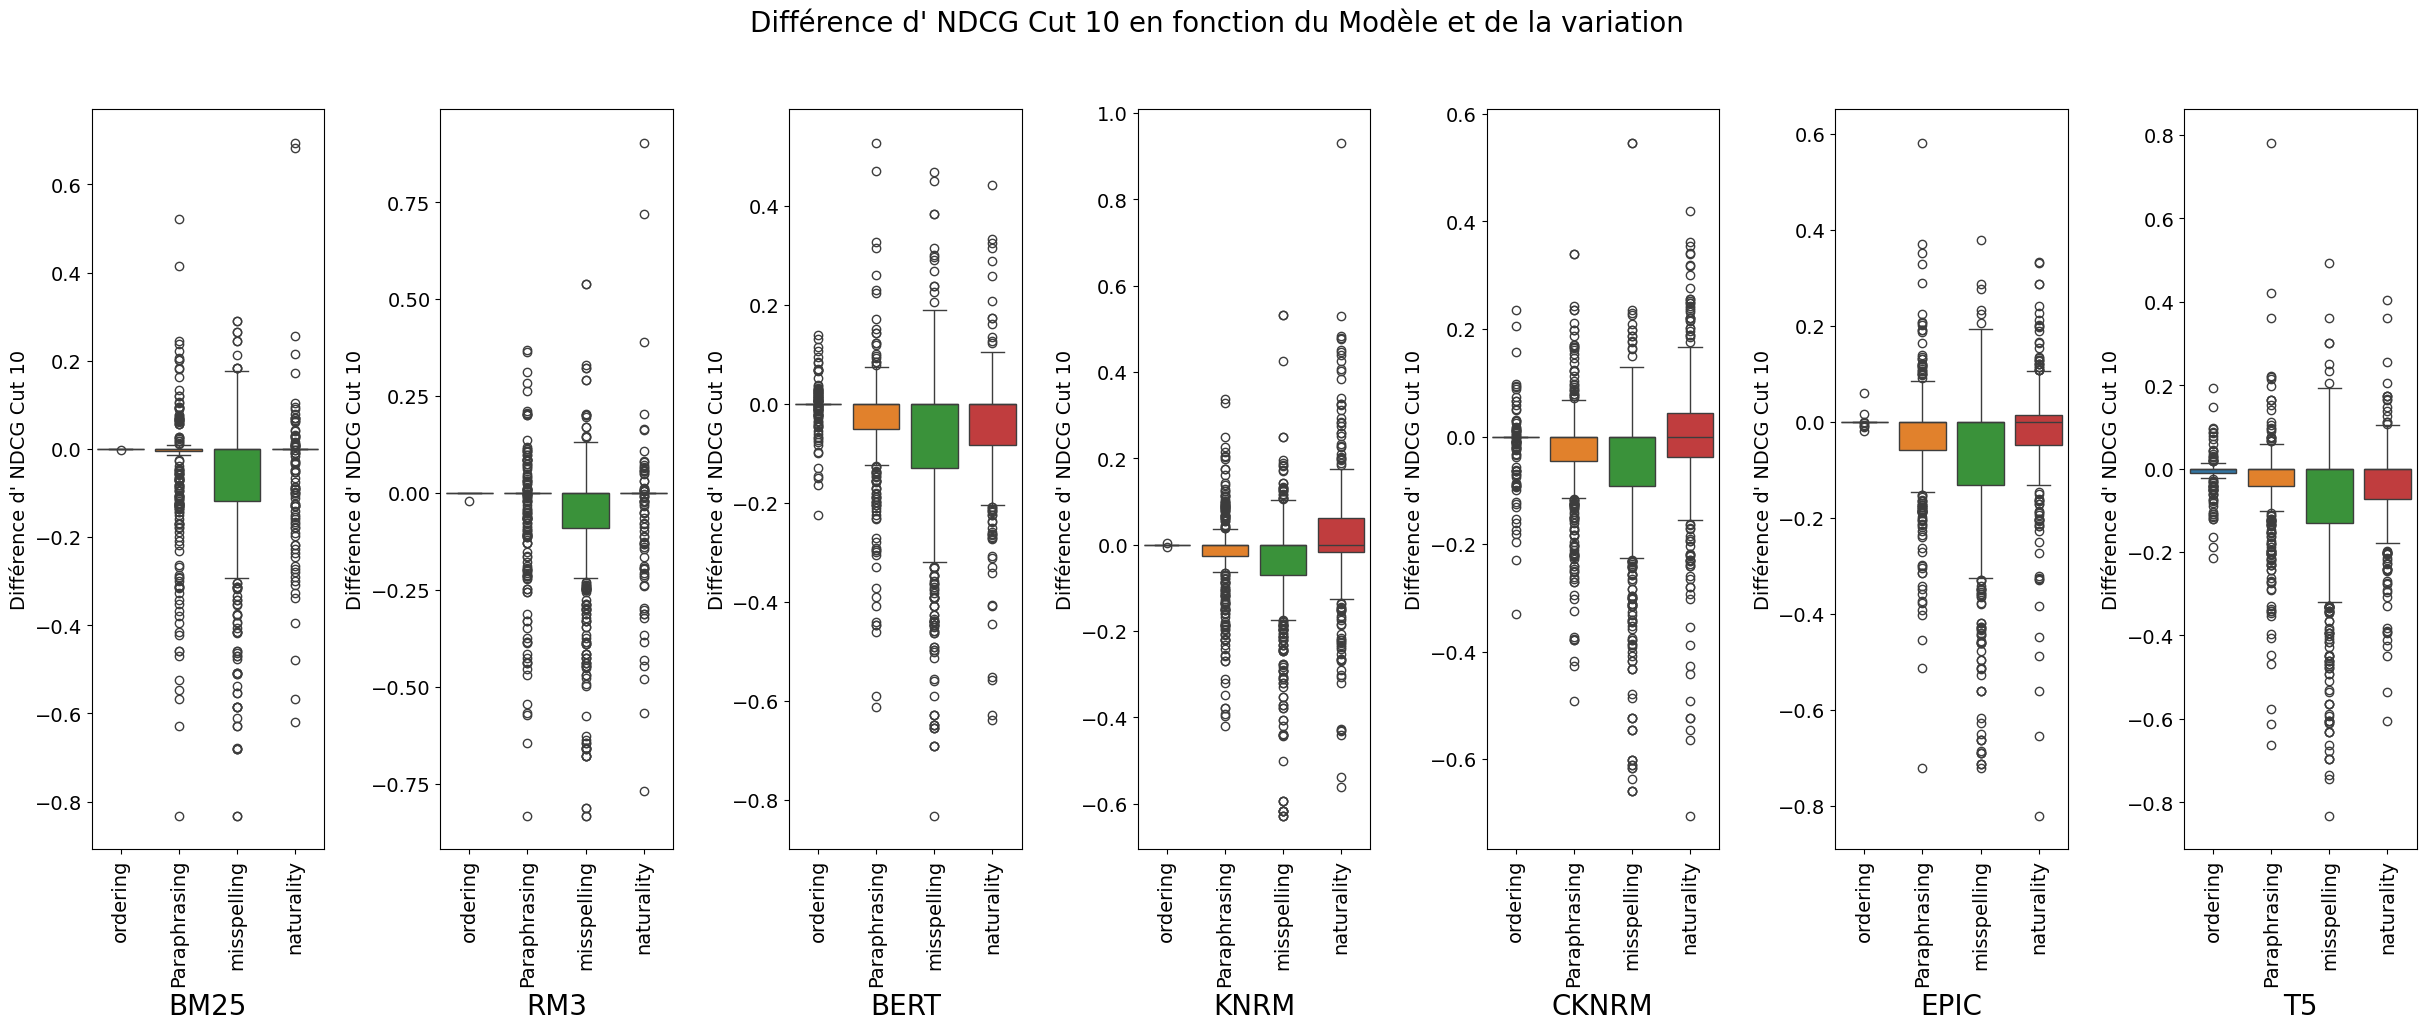

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fonction pour lire le fichier CSV
def lecture_per_q(file_path):
    return pd.read_csv(file_path)

# Définir les modèles et leurs noms
modeles = ['antique_BM_25_q.csv','antique_BM_25_RM3_q.csv', 'antique_BM25_BERT_q.csv', 'antique_BM25_KNRM_q.csv','antique_BM25_CKNRM_q.csv','antique_BM25_EPIC_q.csv', 'antique_BM25_T5_q.csv']
nom_modeles = ['BM25', 'BM25','BM25+BERT', 'BM25+KNRM','BM25+CKNRM', 'BM25+EPIC','BM25+T5']
nom_affichage = ['BM25', 'RM3','BERT', 'KNRM','CKNRM', 'EPIC','T5']

# Créer une grille de sous-graphiques avec une taille plus grande et carrée
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(30, 10))

# Définir les couleurs pastel pour chaque modèle
couleurs_pastel = sns.color_palette("pastel")

for i, modele in enumerate(modeles):

    df3 = pd.read_csv(modele)
    df3['qid'] = df3['qid'].astype(str)

    query_variations = pd.read_csv("variations_antique_labeled.csv")
    query_variations['name'] = query_variations.apply(lambda r, n=nom_modeles[i]: n+"+"+r['method'], axis=1)
    query_variations['qid'] = query_variations['q_id'].astype(str)
    only_valid = df3.merge(query_variations[query_variations['valid']][['qid', 'name', 'valid']], on=['qid', 'name'])
    only_valid_with_baseline = only_valid.merge(df3[df3['name']==nom_modeles[i]], on=['qid', 'measure'])
    only_valid_with_baseline["decrease"] = only_valid_with_baseline['value_x'] - only_valid_with_baseline['value_y']
    only_valid_with_baseline["decrease_percentage"] = only_valid_with_baseline['decrease']/only_valid_with_baseline['value_y']

    only_valid_with_baseline['name_x'] = only_valid_with_baseline['name_x'].apply(lambda x: remplacer_mot(methodes, x))
    only_valid_with_baseline['name_x'] = only_valid_with_baseline['name_x'].apply(lambda x: remplacer_mot(categorie, x))

    data_modele = only_valid_with_baseline

    sns.boxplot(x='name_x', y='decrease', hue='name_x', data=data_modele, ax=axes[i], legend=False)  # Utilisation de hue au lieu de palette

    axes[i].set_xticklabels(data_modele['name_x'].unique(), rotation=90, ha='center', fontsize=12)  # Augmenter la taille de la police des étiquettes x

    axes[i].set_xlabel(nom_affichage[i], fontsize=20)  # Augmenter la taille de la police de l'axe x
    axes[i].set_ylabel('Différence d\' NDCG Cut 10', fontsize=14)  # Augmenter la taille de la police de l'axe y

    axes[i].title.set(y=1.05, fontsize=10)  # Augmenter la taille de la police du titre

    # Augmenter la taille de la police des indices sur les axes
    axes[i].tick_params(axis='both', which='major', labelsize=14)
    axes[i].tick_params(axis='both', which='minor', labelsize=14)

plt.subplots_adjust(wspace=0.5)

plt.subplots_adjust(top=0.85)

plt.suptitle('Différence d\' NDCG Cut 10 en fonction du Modèle et de la variation', y=0.95, fontsize=20)  # Augmenter la taille de la police du titre global

# Afficher le plot
plt.show()
